In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib
import geopandas
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
pd.options.display.max_columns = 100

In [3]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/notebooks/Casey'

In [4]:
# path = '/Volumes/TOSHIBA EXT/Data/Processed/arrival_master_2022-05-13_5000/'

path = '/Users/alvastrand/Downloads/'

os.chdir(path)

In [5]:
os.getcwd()

'/Users/alvastrand/Downloads'

In [6]:
filename = 'arrival_master_2022-05-13.csv'

df = pd.read_csv(filename)
print(df.shape)

df.head(2)

(15012, 18)


,species,cell,cell_lat,cell_lng,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff
0,Chaetura_pelagica,4,24,-84,2002,NaN,NaN,False,90.909590,5.920687,2.021079,0.468736,1.776108,0.105277,NaN,0,1.0,910
1,Chaetura_pelagica,5,24,-82,2002,NaN,NaN,False,93.301279,5.457043,2.021079,0.468736,1.776108,0.105277,NaN,0,1.0,910


In [7]:
df = df.rename(columns={'cell_lat': 'lat', 'cell_lng': 'lon'})

df = df.sort_values(by=['species', 'cell', 'year'])

df = df.reset_index(drop=True)

print(df.shape)

df.head(2)

(15012, 18)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff
0,Antrostomus_carolinensis,4,24,-84,2010,NaN,NaN,False,75.560371,9.075519,2.981226,1.211438,3.501294,0.263926,NaN,0,1.01,716
1,Antrostomus_carolinensis,4,24,-84,2011,NaN,NaN,False,69.553227,9.223410,2.981226,1.211438,3.501294,0.263926,NaN,0,1.01,716


In [8]:
os.getcwd()

'/Users/alvastrand/Downloads'

In [9]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [10]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [11]:
filename = 'ncep_narr_air_2m_ebd_US_states_east_Mississippi_0101_0731_complete_zerofilled_grid_cell_ids_2002_2019_relApr-2020_Casey_lats_lons.csv'

df_t = pd.read_csv(filename)
print(df_t.shape)

df_t.head(2)

(3276, 6)


,cell,year,air_temp_kelvin,gr_mn,cell_lat,cell_lng
0,0,2002,294.254356,21.104356,24.0,-92.0
1,0,2003,293.627635,20.477635,24.0,-92.0


In [12]:
df_t = df_t.rename(columns={'gr_mn': 'air_temp_degrees_celsius', 'cell_lat': 'lat', 'cell_lng': 'lon'})

df_t = df_t[['cell', 'lat', 'lon', 'year', 'air_temp_kelvin', 'air_temp_degrees_celsius']]

df_t = df_t.sort_values(by=['cell', 'year'])

df_t = df_t.reset_index(drop=True)

print(df_t.shape)

df_t.head(2)

(3276, 6)


,cell,lat,lon,year,air_temp_kelvin,air_temp_degrees_celsius
0,0,24.0,-92.0,2002,294.254356,21.104356
1,0,24.0,-92.0,2003,293.627635,20.477635


In [13]:
# Linear mixed modeling

# Prepare data

df_t_out = df_t.drop(columns='air_temp_kelvin')
print(df_t_out.shape)

df_t_out.head(2)

(3276, 5)


,cell,lat,lon,year,air_temp_degrees_celsius
0,0,24.0,-92.0,2002,21.104356
1,0,24.0,-92.0,2003,20.477635


In [14]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [15]:
# df_t_out.to_csv('temperatures_all_cells_all_years_prepared.csv', index=False)

In [16]:
# df_t[df_t['cell'] == 44]

Temperature ~ Year

2002-2019

182
0.08921993921552289
0.13533384076496136
0.13310334200220994


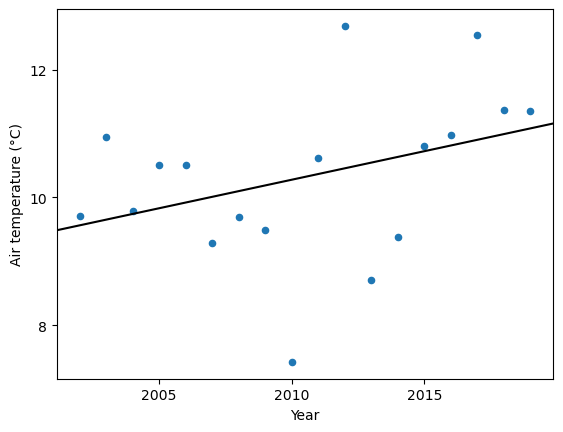

(182, 8)


In [17]:
list_cells_t = df_t['cell'].unique()
print(len(list_cells_t))

list_slopes = []
list_standard_errors = []
list_intercepts = []
list_p_values = []
list_r_squared = []
list_lower_conf_ints = []
list_upper_conf_ints = []

for cell in list_cells_t:
    
    df_cell_t = df_t[df_t['cell'] == cell]
    
    model_ols = smf.ols(formula='air_temp_degrees_celsius ~ year', data=df_cell_t)

    res_ols = model_ols.fit()

    # print(res_ols.summary())

    list_slopes.append(res_ols.params[1])
    
    standard_error = res_ols.bse.iloc[1]
    
    list_standard_errors.append(standard_error)

    list_intercepts.append(res_ols.params[0])
    
    list_p_values.append(res_ols.pvalues[1])

    list_r_squared.append(res_ols.rsquared)
        
    conf_int = [res_ols.conf_int().iloc[1].iloc[0], res_ols.conf_int().iloc[1].iloc[1]]
    
    list_lower_conf_ints.append(conf_int[0])
    
    list_upper_conf_ints.append(conf_int[1])
    
    if cell == 44:
        
        print(res_ols.params[1])

        print(res_ols.rsquared)

        print(res_ols.pvalues[1])

        ax = df_cell_t.plot.scatter(x='year', y='air_temp_degrees_celsius')

        abline_plot(model_results=res_ols, ax=ax, color='black')

        plt.rc('font', size=24)
        plt.rc('axes', titlesize=24)
        plt.rc('axes', labelsize=24)
        plt.rc('xtick', labelsize=24)
        plt.rc('ytick', labelsize=24)

        plt.xlabel('Year')

        plt.ylabel('Air temperature (°C)')

        plt.savefig('20220621_temperature_change.pdf', bbox_inches='tight')

        plt.show()
    
df_results_t = pd.DataFrame(data={'cell': list_cells_t, 'slope_temp_change_all_years': list_slopes, 
                                  'standard_error_temp_change_all_years': list_standard_errors, 
                                  'intercept_temp_change_all_years': list_intercepts, 
                                  'p_value_temp_change_all_years': list_p_values, 
                                  'r_squared_temp_change_all_years': list_r_squared, 
                                  'lower_conf_int_temp_change_all_years': list_lower_conf_ints, 
                                  'upper_conf_int_temp_change_all_years': list_upper_conf_ints})
print(df_results_t.shape)

In [18]:
df_results_t.head(2)

,cell,slope_temp_change_all_years,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years
0,0,0.047530,0.039869,-74.496379,0.250578,0.081582,-0.036988,0.132049
1,1,0.050006,0.037956,-79.129506,0.206236,0.097866,-0.030457,0.130469


In [19]:
# Prepare data

print(os.getcwd())

/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output


In [20]:
# df_results_t.to_csv('betas_temperature_year_ols.csv', index=False)

Temperature variance?

In [21]:
df_merged = df.merge(df_t, on=['cell', 'year', 'lat', 'lon'])
print(df_merged.shape)

df_merged.head(2)

(15012, 20)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_kelvin,air_temp_degrees_celsius
0,Antrostomus_carolinensis,4,24,-84,2010,NaN,NaN,False,75.560371,9.075519,2.981226,1.211438,3.501294,0.263926,NaN,0,1.01,716,292.121459,18.971459
1,Antrostomus_vociferus,4,24,-84,2010,NaN,NaN,False,58.827179,7.212024,0.998877,0.743532,3.464462,0.242849,NaN,0,1.00,886,292.121459,18.971459


In [22]:
df_merged = df_merged.dropna(subset=['arr_GAM_mean'])
print(df_merged.shape)

df_merged.head(2)

(6016, 20)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_kelvin,air_temp_degrees_celsius
104,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,290.741547,17.591547
114,Hirundo_rustica,5,24,-82,2011,77.195000,15.197718,False,80.224858,4.138189,2.85316,0.633302,2.053789,0.098024,0.999,0,1.0,945,293.115626,19.965626


In [23]:
df_merged = df_merged[df_merged['VALID_GAM'] == True]

df_merged = df_merged.reset_index(drop=True)

print(df_merged.shape)

df_merged.head(2)

(4724, 20)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_kelvin,air_temp_degrees_celsius
0,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,290.741547,17.591547
1,Hirundo_rustica,5,24,-82,2012,84.357667,13.455486,True,82.674423,3.737352,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,293.728819,20.578819


In [24]:
# df_merged[(df_merged['species'] == 'Hirundo_rustica') & (df_merged['cell'] == 44)]

In [25]:
len(df_merged[(df_merged['species'] == 'Hirundo_rustica') & (df_merged['cell'] == 44)])

12

In [26]:
list_sci_names = sorted(df_merged['species'].unique())
print(len(list_sci_names))

10


Temperature ~ Year

Years with day data for species-cells

In [27]:
def get_change_in_temp(species, df_species, list_cells):

    list_slopes = []
    list_intercepts = []
    list_r_squared = []
    list_p_values = []

    for cell in list_cells:

        df_cell_t = df_species[df_species['cell'] == cell]

        model_ols = smf.ols(formula='air_temp_degrees_celsius ~ year', data=df_cell_t)

        res_ols = model_ols.fit()

        # print(res_ols.summary())

        list_slopes.append(res_ols.params[1])

        list_intercepts.append(res_ols.params[0])

        list_r_squared.append(res_ols.rsquared)

        list_p_values.append(res_ols.pvalues[1])
        
        if cell == 44 and species == 'Hirundo_rustica':
        
            print(res_ols.rsquared)

            print(res_ols.pvalues[1])

            ax = df_cell_t.plot.scatter(x='year', y='air_temp_degrees_celsius')

            abline_plot(model_results=res_ols, ax=ax, color='black')

            plt.rc('font', size=24)
            plt.rc('axes', titlesize=24)
            plt.rc('axes', labelsize=24)
            plt.rc('xtick', labelsize=24)
            plt.rc('ytick', labelsize=24)

            plt.xlabel('Year')

            plt.ylabel('Air temperature (°C)')

            plt.savefig('20220621_temperature_change.pdf', bbox_inches='tight')

            plt.show()

    df_results_t = pd.DataFrame(data={'cell': list_cells, 'slope_temp_change': list_slopes, 'intercept_temp_change': list_intercepts, 
                                    'r_squared_temp_change': list_r_squared, 'p_value_temp_change': list_p_values})
    
    return df_results_t

In [28]:
df_speeds = df_merged[['species', 'beta_gamma_mean']].drop_duplicates()

df_speeds = df_speeds.reset_index(drop=True)
print(df_speeds.shape)

df_speeds.head(2)

(10, 2)


,species,beta_gamma_mean
0,Hirundo_rustica,2.053789
1,Chordeiles_minor,1.363545


In [29]:
df_means = df_merged[['species', 'arr_IAR_mean']].groupby(['species']).mean()

df_means = df_means.reset_index()

df_means = df_means.rename(columns={'arr_IAR_mean': 'mean_arrival_day'})

print(df_means.shape)

df_means.head(2)

(10, 2)


,species,mean_arrival_day
0,Antrostomus_carolinensis,108.002908
1,Antrostomus_vociferus,114.550493


In [30]:
df_speeds_means = df_speeds.merge(df_means, on='species')

df_speeds_means = df_speeds_means.rename(columns={'species': 'scientific_name'})

df_speeds_means['scientific_name'] = df_speeds_means['scientific_name'].str.replace('_', ' ')

print(df_speeds_means.shape)

df_speeds_means.head(2)

(10, 3)


,scientific_name,beta_gamma_mean,mean_arrival_day
0,Hirundo rustica,2.053789,105.614979
1,Chordeiles minor,1.363545,125.892520


In [31]:
# Linear mixed modeling

# Prepare data

print(os.getcwd())

/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output


In [32]:
# df_speeds_means.to_csv('aerial_insectivores_speeds_mean_arrival_days.csv', index=False)

In [33]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [34]:
path = '/Users/alvastrand/Downloads/states_21basic/'

os.chdir(path)

In [35]:
os.getcwd()

'/Users/alvastrand/Downloads/states_21basic'

In [36]:
df_usa = geopandas.read_file('states.shp')
print(df_usa.shape)

df_usa.head(2)

(51, 6)


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."


In [37]:
df_usa_c = df_usa[(df_usa['STATE_NAME'] == 'Alabama') | (df_usa['STATE_NAME'] == 'Connecticut') | 
                  (df_usa['STATE_NAME'] == 'Delaware') | (df_usa['STATE_NAME'] == 'Florida') | 
                  (df_usa['STATE_NAME'] == 'Georgia') | (df_usa['STATE_NAME'] == 'Illinois') | 
                  (df_usa['STATE_NAME'] == 'Indiana') | (df_usa['STATE_NAME'] == 'Kentucky') | 
                  (df_usa['STATE_NAME'] == 'Maine') | (df_usa['STATE_NAME'] == 'Maryland') | 
                  (df_usa['STATE_NAME'] == 'Massachusetts') | (df_usa['STATE_NAME'] == 'Michigan') | 
                  (df_usa['STATE_NAME'] == 'Missouri') | (df_usa['STATE_NAME'] == 'New Hampshire') | 
                  (df_usa['STATE_NAME'] == 'New Jersey') | (df_usa['STATE_NAME'] == 'New York') | 
                  (df_usa['STATE_NAME'] == 'North Carolina') | (df_usa['STATE_NAME'] == 'Ohio') | 
                  (df_usa['STATE_NAME'] == 'Pennsylvania') | (df_usa['STATE_NAME'] == 'Rhode Island') | 
                  (df_usa['STATE_NAME'] == 'South Carolina') | (df_usa['STATE_NAME'] == 'Tennessee') | 
                  (df_usa['STATE_NAME'] == 'Vermont') | (df_usa['STATE_NAME'] == 'Virginia') | 
                  (df_usa['STATE_NAME'] == 'West Virginia') | (df_usa['STATE_NAME'] == 'Wisconsin')]

df_usa_c = df_usa_c.reset_index(drop=True)

print(df_usa_c.shape)

df_usa_c.head(2)

(26, 6)


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
1,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."


In [38]:
number_of_years = 5

# number_of_years = 3

In [39]:
# predictor_variable = 'year'

predictor_variable = 'air_temp_degrees_celsius'

In [40]:
# Linear mixed modeling

# Prepare data

df_merged = df_merged.drop(columns='air_temp_kelvin')
print(df_merged.shape)

df_merged.head(2)

(4724, 19)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_degrees_celsius
0,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,17.591547
1,Hirundo_rustica,5,24,-82,2012,84.357667,13.455486,True,82.674423,3.737352,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,20.578819


In [41]:
print(os.getcwd())

/Users/alvastrand/Downloads/states_21basic


In [42]:
# df_merged.to_csv('aerial_insectivores_mean_arrival_days_prepared_all_cells.csv', index=False)

In [43]:
df_cnt = df_merged[['species', 'cell', 'year']].groupby(['species', 'cell']).count()

df_cnt = df_cnt.reset_index()

df_cnt = df_cnt.rename(columns={'year': 'number_of_years'})

print(df_cnt.shape)

df_cnt.head(2)

(629, 3)


,species,cell,number_of_years
0,Antrostomus_carolinensis,19,7
1,Antrostomus_carolinensis,33,3


In [44]:
df_cnt = df_cnt[df_cnt['number_of_years'] >= number_of_years]
print(df_cnt.shape)

df_cnt.head(2)

(450, 3)


,species,cell,number_of_years
0,Antrostomus_carolinensis,19,7
4,Antrostomus_carolinensis,45,6


In [45]:
df_merged = df_merged.merge(df_cnt[['species', 'cell']], on=['species', 'cell'])
print(df_merged.shape)

df_merged.head(2)

(4281, 19)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_degrees_celsius
0,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,17.591547
1,Hirundo_rustica,5,24,-82,2012,84.357667,13.455486,True,82.674423,3.737352,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,20.578819


In [46]:
print(os.getcwd())

/Users/alvastrand/Downloads/states_21basic


In [47]:
# df_merged.to_csv('aerial_insectivores_mean_arrival_days_prepared.csv', index=False)

In [48]:
df_cnt_earliest_year = df_merged[['species', 'cell', 'year']].groupby(['species', 'cell']).min()

df_cnt_earliest_year = df_cnt_earliest_year.reset_index()

df_cnt_earliest_year = df_cnt_earliest_year.rename(columns={'year': 'earliest_year'})

print(df_cnt_earliest_year.shape)

df_cnt_earliest_year.head(2)

(450, 3)


,species,cell,earliest_year
0,Antrostomus_carolinensis,19,2010
1,Antrostomus_carolinensis,45,2014


In [49]:
df_cnt_latest_year = df_merged[['species', 'cell', 'year']].groupby(['species', 'cell']).max()

df_cnt_latest_year = df_cnt_latest_year.reset_index()

df_cnt_latest_year = df_cnt_latest_year.rename(columns={'year': 'latest_year'})

print(df_cnt_latest_year.shape)

df_cnt_latest_year.head(2)

(450, 3)


,species,cell,latest_year
0,Antrostomus_carolinensis,19,2017
1,Antrostomus_carolinensis,45,2019


In [50]:
df_cnt_years = df_cnt_earliest_year.merge(df_cnt_latest_year, on=['species', 'cell'])
print(df_cnt_years.shape)

df_cnt_years.head(2)

(450, 4)


,species,cell,earliest_year,latest_year
0,Antrostomus_carolinensis,19,2010,2017
1,Antrostomus_carolinensis,45,2014,2019


In [51]:
list_mean_temperatures = []
list_slopes = []
list_standard_errors = []
list_intercepts = []
list_p_values = []
list_r_squared = []
list_lower_conf_ints = []
list_upper_conf_ints = []

for i in range(len(df_cnt_years)):
    
    cell = df_cnt_years['cell'].iloc[i]
#     print(cell)
    
    earliest_year = df_cnt_years['earliest_year'].iloc[i]
#     print(earliest_year)
    
    latest_year = df_cnt_years['latest_year'].iloc[i]
#     print(latest_year)
    
    df_t_cell = df_t_out[df_t_out['cell'] == cell]
#     print(df_t_cell.shape)
    
#     print(df_t_cell.head(2))
    
    df_t_cell_years = df_t_cell[(df_t_cell['year'] >= earliest_year) & (df_t_cell['year'] <= latest_year)]
#     print(df_t_cell_years.shape)
    
#     print(df_t_cell_years.head(2))
    
    mean_temperature = df_t_cell_years['air_temp_degrees_celsius'].mean()
#     print(mean_temperature)
    
    list_mean_temperatures.append(mean_temperature)

    model_ols = smf.ols(formula='air_temp_degrees_celsius ~ year', data=df_t_cell_years)

    res_ols = model_ols.fit()

#     print(res_ols.summary())

    list_slopes.append(res_ols.params[1])
    
    standard_error = res_ols.bse.iloc[1]
    
    list_standard_errors.append(standard_error)

    list_intercepts.append(res_ols.params[0])
    
    list_p_values.append(res_ols.pvalues[1])

    list_r_squared.append(res_ols.rsquared)
        
    conf_int = [res_ols.conf_int().iloc[1].iloc[0], res_ols.conf_int().iloc[1].iloc[1]]
    
    list_lower_conf_ints.append(conf_int[0])
    
    list_upper_conf_ints.append(conf_int[1])

In [52]:
df_cnt_years['slope_temp_year_years'] = list_slopes

df_cnt_years['standard_error_temp_year_years'] = list_standard_errors

df_cnt_years['intercept_temp_year_years'] = list_intercepts

df_cnt_years['p_value_temp_year_years'] = list_p_values

df_cnt_years['r_squared_temp_year_years'] = list_r_squared

df_cnt_years['lower_conf_int_temp_year_years'] = list_lower_conf_ints

df_cnt_years['upper_conf_int_temp_year_years'] = list_upper_conf_ints

print(df_cnt_years.shape)

df_cnt_years.head(2)

(450, 11)


,species,cell,earliest_year,latest_year,slope_temp_year_years,standard_error_temp_year_years,intercept_temp_year_years,p_value_temp_year_years,r_squared_temp_year_years,lower_conf_int_temp_year_years,upper_conf_int_temp_year_years
0,Antrostomus_carolinensis,19,2010,2017,0.310525,0.185129,-610.402682,0.144486,0.319225,-0.142469,0.763518
1,Antrostomus_carolinensis,45,2014,2019,0.303084,0.143583,-600.626366,0.102391,0.526948,-0.095567,0.701736


In [53]:
# Prepare data

print(os.getcwd())

/Users/alvastrand/Downloads/states_21basic


In [54]:
# df_cnt_years.to_csv('aerial_insectivores_betas_temperature_year_years_ols.csv', index=False)

In [55]:
df_cnt_years['mean_air_temperature_degrees_celsius'] = list_mean_temperatures
print(df_cnt_years.shape)

df_cnt_years.head(2)

(450, 12)


,species,cell,earliest_year,latest_year,slope_temp_year_years,standard_error_temp_year_years,intercept_temp_year_years,p_value_temp_year_years,r_squared_temp_year_years,lower_conf_int_temp_year_years,upper_conf_int_temp_year_years,mean_air_temperature_degrees_celsius
0,Antrostomus_carolinensis,19,2010,2017,0.310525,0.185129,-610.402682,0.144486,0.319225,-0.142469,0.763518,14.838697
1,Antrostomus_carolinensis,45,2014,2019,0.303084,0.143583,-600.626366,0.102391,0.526948,-0.095567,0.701736,10.543323


In [56]:
list_mean_days = []

for i in range(len(df_cnt_years)):
    
    species = df_cnt_years['species'].iloc[i]
#     print(species)
    
    cell = df_cnt_years['cell'].iloc[i]
#     print(cell)
    
    df_species_cell = df_merged[(df_merged['species'] == species) & (df_merged['cell'] == cell)]
#     print(df_species_cell.shape)
    
#     print(df_species_cell.head(2))
    
    mean_day = df_species_cell['arr_IAR_mean'].mean()
#     print(mean_day)
    
    list_mean_days.append(mean_day)
#     print(list_mean_days)

In [57]:
df_cnt_years['mean_day'] = list_mean_days
print(df_cnt_years.shape)

df_cnt_years.head(2)

(450, 13)


,species,cell,earliest_year,latest_year,slope_temp_year_years,standard_error_temp_year_years,intercept_temp_year_years,p_value_temp_year_years,r_squared_temp_year_years,lower_conf_int_temp_year_years,upper_conf_int_temp_year_years,mean_air_temperature_degrees_celsius,mean_day
0,Antrostomus_carolinensis,19,2010,2017,0.310525,0.185129,-610.402682,0.144486,0.319225,-0.142469,0.763518,14.838697,75.839651
1,Antrostomus_carolinensis,45,2014,2019,0.303084,0.143583,-600.626366,0.102391,0.526948,-0.095567,0.701736,10.543323,94.921542


In [58]:
df_merged = df_merged.merge(df_cnt_years[['species', 'cell', 'mean_air_temperature_degrees_celsius', 'mean_day']], 
                            on=['species', 'cell'])
print(df_merged.shape)

df_merged.head(2)

(4281, 21)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_degrees_celsius,mean_air_temperature_degrees_celsius,mean_day
0,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,17.591547,19.95252,81.042522
1,Hirundo_rustica,5,24,-82,2012,84.357667,13.455486,True,82.674423,3.737352,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,20.578819,19.95252,81.042522


In [59]:
df_merged['difference_air_temp_degrees_celsius'] = df_merged['air_temp_degrees_celsius'] - df_merged['mean_air_temperature_degrees_celsius']

df_merged['difference_days'] = df_merged['arr_IAR_mean'] - df_merged['mean_day']

print(df_merged.shape)

df_merged.head(2)

(4281, 23)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_degrees_celsius,mean_air_temperature_degrees_celsius,mean_day,difference_air_temp_degrees_celsius,difference_days
0,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,17.591547,19.95252,81.042522,-2.360973,2.120981
1,Hirundo_rustica,5,24,-82,2012,84.357667,13.455486,True,82.674423,3.737352,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,20.578819,19.95252,81.042522,0.626299,1.631901


In [60]:
# Linear mixed modeling

# Prepare data

print(os.getcwd())

/Users/alvastrand/Downloads/states_21basic


In [61]:
# df_merged.to_csv('aerial_insectivores_mean_arrival_days_differences_for_modeling.csv', index=False)

In [62]:
def model_day_anomaly_temp_anomaly(species):

    df_species = df_merged[df_merged['species'] == species]
    print(df_species.shape)

    # print(df_species.head(2))
    
    list_cells = list(df_species['cell'].unique())
    print(len(list_cells))
    
    model_ols = smf.ols(formula='difference_days ~ difference_air_temp_degrees_celsius', data=df_species)

    res_ols = model_ols.fit()

    print(res_ols.summary())

    slope_species = res_ols.params[1]
    
    standard_error_species = res_ols.bse.iloc[1]

    intercept_species = res_ols.params[0]
    
    p_value_species = res_ols.pvalues[1]

    r_squared_species = res_ols.rsquared
    
    conf_int_species = [res_ols.conf_int().iloc[1].iloc[0], res_ols.conf_int().iloc[1].iloc[1]]
    
    list_slopes = []
    list_intercepts = []
    list_r_squared = []
    list_p_values = []

    for cell in list_cells:
        
#         print(cell)

        df_cell = df_species[df_species['cell'] == cell]
#         print(df_cell.shape)

        model_ols = smf.ols(formula='difference_days ~ difference_air_temp_degrees_celsius', data=df_cell)
        
        res_ols = model_ols.fit()

#         print(res_ols.summary())

        list_slopes.append(res_ols.params[1])

        # Standard error?

        list_intercepts.append(res_ols.params[0])
        
        list_p_values.append(res_ols.pvalues[1])

        list_r_squared.append(res_ols.rsquared)
        
        # 95% confidence interval?
        
    df_results = pd.DataFrame(data={'cell': list_cells, 'slope': list_slopes, 'intercept': list_intercepts, 
                                    'p_value': list_p_values, 'r_squared': list_r_squared})
#     print(df_results.shape)

    # print(df_results.head(2))
    
    df_lat_lon = df_t[['cell', 'lat', 'lon']].drop_duplicates()
    # print(df_lat_lon.shape)

    # print(df_lat_lon.head(2))

    df_results = df_results.merge(df_lat_lon, on='cell')

    df_results['scientific_name'] = species

    print(df_results.shape)

    # print(df_results.head(2))
    
    return df_results, slope_species, standard_error_species, intercept_species, p_value_species, r_squared_species, \
conf_int_species

In [63]:
df_results_all_anomalies = pd.DataFrame()

list_slopes_anomalies_species = []
list_standard_errors_anomalies_species = []
list_intercepts_anomalies_species = []
list_p_values_anomalies_species = []
list_r_squared_anomalies_species = []
list_lower_conf_ints_anomalies_species = []
list_upper_conf_ints_anomalies_species = []

for species in list_sci_names:

    print(species)

    df_results_anomalies, slope_anomalies_species, standard_error_anomalies_species, intercept_anomalies_species, \
    p_value_anomalies_species, r_squared_anomalies_species, conf_int_anomalies_species = model_day_anomaly_temp_anomaly(species)

    df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)
    
    list_slopes_anomalies_species.append(slope_anomalies_species)
    list_standard_errors_anomalies_species.append(standard_error_anomalies_species)
    list_intercepts_anomalies_species.append(intercept_anomalies_species)
    list_p_values_anomalies_species.append(p_value_anomalies_species)
    list_r_squared_anomalies_species.append(r_squared_anomalies_species)
    list_lower_conf_ints_anomalies_species.append(conf_int_anomalies_species[0])
    list_upper_conf_ints_anomalies_species.append(conf_int_anomalies_species[1])

Antrostomus_carolinensis
(132, 23)
21
                            OLS Regression Results                            
Dep. Variable:        difference_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1984
Date:                Sun, 16 Jul 2023   Prob (F-statistic):              0.657
Time:                        23:47:44   Log-Likelihood:                -329.65
No. Observations:                 132   AIC:                             663.3
Df Residuals:                     130   BIC:                             669.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)
/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)


(70, 8)
Chordeiles_minor
(261, 23)
36
                            OLS Regression Results                            
Dep. Variable:        difference_days   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     23.58
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           2.07e-06
Time:                        23:47:44   Log-Likelihood:                -494.38
No. Observations:                 261   AIC:                             992.8
Df Residuals:                     259   BIC:                             999.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)
/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)


(73, 8)
Petrochelidon_pyrrhonota
(326, 23)
43
                            OLS Regression Results                            
Dep. Variable:        difference_days   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.544
Date:                Sun, 16 Jul 2023   Prob (F-statistic):             0.0338
Time:                        23:47:45   Log-Likelihood:                -733.43
No. Observations:                 326   AIC:                             1471.
Df Residuals:                     324   BIC:                             1478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)
/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)


(35, 8)
Riparia_riparia
(231, 23)
29
                            OLS Regression Results                            
Dep. Variable:        difference_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1528
Date:                Sun, 16 Jul 2023   Prob (F-statistic):              0.696
Time:                        23:47:45   Log-Likelihood:                -514.41
No. Observations:                 231   AIC:                             1033.
Df Residuals:                     229   BIC:                             1040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)
/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)


(65, 8)
Tachycineta_bicolor
(646, 23)
54
                            OLS Regression Results                            
Dep. Variable:        difference_days   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     235.5
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           1.60e-45
Time:                        23:47:46   Log-Likelihood:                -1610.2
No. Observations:                 646   AIC:                             3224.
Df Residuals:                     644   BIC:                             3233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)
/var/folders/94/vmb3wczd7g1fpr9_16m011tw0000gn/T/ipykernel_61939/1659253907.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_all_anomalies = df_results_all_anomalies.append(df_results_anomalies)


In [64]:
df_results_all_anomalies['scientific_name'] = df_results_all_anomalies['scientific_name'].str.replace('_', ' ')
print(df_results_all_anomalies.shape)

df_results_all_anomalies.head(2)

(450, 8)


,cell,slope,intercept,p_value,r_squared,lat,lon,scientific_name
0,19,-3.208961,1.217619e-01,0.064863,0.526652,26.0,-82.0,Antrostomus carolinensis
1,45,-0.671713,7.105427e-15,0.693882,0.042864,30.0,-86.0,Antrostomus carolinensis


In [65]:
print(os.getcwd())

/Users/alvastrand/Downloads/states_21basic


In [66]:
# df_results_all_anomalies.to_csv('aerial_insectivores_betas_day_anomaly_temp_anomaly_per_cell.csv', index=False)

In [67]:
df_slopes_anomalies_species = pd.DataFrame(data={'scientific_name': list_sci_names, 
                                                 'slope': list_slopes_anomalies_species, 
                                                 'standard_error': list_standard_errors_anomalies_species, 
                                                 'intercept': list_intercepts_anomalies_species, 
                                                 'p_value': list_p_values_anomalies_species, 
                                                 'r_squared': list_r_squared_anomalies_species, 
                                                 'lower_conf_int': list_lower_conf_ints_anomalies_species, 
                                                 'upper_conf_int': list_upper_conf_ints_anomalies_species})

df_slopes_anomalies_species['scientific_name'] = df_slopes_anomalies_species['scientific_name'].str.replace('_', ' ')

print(df_slopes_anomalies_species.shape)

df_slopes_anomalies_species

(10, 8)


,scientific_name,slope,standard_error,intercept,p_value,r_squared,lower_conf_int,upper_conf_int
0,Antrostomus carolinensis,0.079411,0.178268,-0.001398,6.567288e-01,0.001524,-0.273270,0.432092
1,Antrostomus vociferus,-0.084139,0.071891,0.002150,2.435283e-01,0.008184,-0.226077,0.057799
2,Chaetura pelagica,0.027426,0.043137,0.000395,5.251069e-01,0.000511,-0.057251,0.112102
3,Chordeiles minor,0.246233,0.050702,-0.002914,2.069988e-06,0.083462,0.146392,0.346075
4,Hirundo rustica,-0.121068,0.054453,-0.000911,2.647992e-02,0.006354,-0.227961,-0.014175
5,Petrochelidon pyrrhonota,-0.136671,0.064112,-0.003796,3.377846e-02,0.013832,-0.262798,-0.010543
6,Progne subis,0.148223,0.105817,-0.001023,1.624865e-01,0.007519,-0.060148,0.356595
7,Riparia riparia,-0.027070,0.069252,-0.001080,6.962393e-01,0.000667,-0.163522,0.109382
8,Stelgidopteryx serripennis,-0.339194,0.040925,0.005062,6.046284e-16,0.091024,-0.419547,-0.258841
9,Tachycineta bicolor,-0.893414,0.058222,0.013433,1.598823e-45,0.267740,-1.007742,-0.779087


In [68]:
print(os.getcwd())

/Users/alvastrand/Downloads/states_21basic


In [69]:
# df_slopes_anomalies_species.to_csv('aerial_insectivores_betas_day_anomaly_temp_anomaly_per_species.csv', index=False)

In [ ]:
def name_of_function(species, predictor_variable):

    df_species = df_merged[df_merged['species'] == species]
    print(df_species.shape)

    # print(df_species.head(2))
    
    
    
    df_cnt = df_species[['cell', 'year']].groupby(['cell']).count()

    df_cnt = df_cnt.reset_index()

    df_cnt = df_cnt.rename(columns={'year': 'number_of_years'})

    print(df_cnt.shape)

    # print(df_cnt.head(2))

    list_cells = list(df_cnt[df_cnt['number_of_years'] >= number_of_years]['cell'])
    print(len(list_cells))

    # print(len(list(df_cnt[df_cnt['number_of_years'] >= 3]['cell'])))

    df_species = df_species[df_species['cell'].isin(list_cells)]
    print(df_species.shape)
    
    
    
    list_slopes = []
    list_intercepts = []
    list_r_squared = []
    list_p_values = []

    for cell in list_cells:

        df_cell = df_species[df_species['cell'] == cell]

        model_ols = smf.ols(formula='arr_IAR_mean' + ' ~ ' + predictor_variable, data=df_cell)

        res_ols = model_ols.fit()

        # print(res_ols.summary())

        list_slopes.append(res_ols.params[1])

        list_intercepts.append(res_ols.params[0])

        list_r_squared.append(res_ols.rsquared)

        list_p_values.append(res_ols.pvalues[1])
        
        if (species == 'Hirundo_rustica') & (res_ols.params[1] < -0.8):

            print(cell)
            
            print(res_ols.params[1])

            print(res_ols.rsquared)
            
            print(res_ols.pvalues[1])

            ax = df_cell.plot.scatter(x=predictor_variable, y='arr_IAR_mean')

            abline_plot(model_results=res_ols, ax=ax, color='black')

            plt.rc('font', size=24)
            plt.rc('axes', titlesize=24)
            plt.rc('axes', labelsize=24)
            plt.rc('xtick', labelsize=24)
            plt.rc('ytick', labelsize=24)

            plt.xlabel('Mean minimum daily spring air temperature (°C)')
            
            plt.ylabel('Mean arrival day')
            
#             plt.savefig('20220621_temperature.pdf', bbox_inches='tight')

            plt.show()

    df_results = pd.DataFrame(data={'cell': list_cells, 'slope': list_slopes, 'intercept': list_intercepts, 
                                    'r_squared': list_r_squared, 'p_value': list_p_values})
    print(df_results.shape)

    # print(df_results.head(2))

    # Quality control?
    
    

    df_lat_lon = df_t[['cell', 'lat', 'lon']].drop_duplicates()
    # print(df_lat_lon.shape)

    # print(df_lat_lon.head(2))

    df_results = df_results.merge(df_lat_lon, on='cell')

    df_results['scientific_name'] = species

    print(df_results.shape)

    # print(df_results.head(2))
    
    
    
#     # Latitude

#     predictor_variable = 'lat'

#     model_ols = smf.ols(formula='slope' + ' ~ ' + predictor_variable, data=df_results)

#     res_ols = model_ols.fit()

#     slope_lat = res_ols.params[1]
#     # print(slope_lat)
    
#     if species == 'Hirundo_rustica':
        
#         print(res_ols.rsquared)

#         print(res_ols.pvalues[1])

#         ax = df_results.plot.scatter(x=predictor_variable, y='slope')

#         abline_plot(model_results=res_ols, ax=ax, color='black')

#         plt.rc('font', size=24)
#         plt.rc('axes', titlesize=24)
#         plt.rc('axes', labelsize=24)
#         plt.rc('xtick', labelsize=24)
#         plt.rc('ytick', labelsize=24)

#         plt.xlabel('Latitude')

#         plt.ylabel('Sensitivity (days/°C)')

#         plt.savefig('20220621_latitude.pdf', bbox_inches='tight')

#         plt.show()


    
    # Change in temperature as a function of time
    
    df_results_t_species = get_change_in_temp(species, df_species, list_cells)
    print(df_results_t_species.shape)
    
    # print(df_results_t_species.head(2))
    
    df_results = df_results.merge(df_results_t_species, on='cell')
    print(df_results.shape)

    # print(df_results.head(2))

    model_ols = smf.ols(formula='slope ~ slope_temp_change', data=df_results)

    res_ols = model_ols.fit()

    slope_temp_change = res_ols.params[1]
    # print(slope_temp_change)
        
    r_squared_temp_change = res_ols.rsquared
    # print(r_squared_temp_change)

    p_value_temp_change = res_ols.pvalues[1]
    # print(p_value_temp_change)
    
    err_temp_change = slope_temp_change - res_ols.conf_int()[0]['slope_temp_change']
    # print(err_temp_change)
    
    if species == 'Hirundo_rustica':

        ax = df_results.plot.scatter(x='slope_temp_change', y='slope')

        abline_plot(model_results=res_ols, ax=ax, color='black')
        
        plt.axhline(y=0, color='grey', linestyle='--')
        
        plt.axvline(x=0, color='grey', linestyle='--')

        plt.rc('font', size=24)
        plt.rc('axes', titlesize=24)
        plt.rc('axes', labelsize=24)
        plt.rc('xtick', labelsize=24)
        plt.rc('ytick', labelsize=24)

        plt.xlabel('Air temperature change over time (°C/year)')

        plt.ylabel('Sensitivity (days/°C)')

#         plt.savefig('20220621_sens_temperature_change.pdf', bbox_inches='tight')

        plt.show()
    
    # All of the years
    
    df_results = df_results.merge(df_results_t, on='cell')
    print(df_results.shape)

    # print(df_results.head(2))

    model_ols = smf.ols(formula='slope ~ slope_temp_change_all_years', data=df_results)

    res_ols = model_ols.fit()

    slope_temp_change_all_years = res_ols.params[1]
    print(slope_temp_change_all_years)
        
    r_squared_temp_change_all_years = res_ols.rsquared
    print(r_squared_temp_change_all_years)

    p_value_temp_change_all_years = res_ols.pvalues[1]
    print(p_value_temp_change_all_years)
    
    err_temp_change_all_years = slope_temp_change_all_years - res_ols.conf_int()[0]['slope_temp_change_all_years']
    print(err_temp_change_all_years)
    
    if species == 'Hirundo_rustica':

        ax = df_results.plot.scatter(x='slope_temp_change_all_years', y='slope')

        abline_plot(model_results=res_ols, ax=ax, color='black')
        
        plt.axhline(y=0, color='grey', linestyle='--')
        
        plt.axvline(x=0, color='grey', linestyle='--')

        plt.rc('font', size=24)
        plt.rc('axes', titlesize=24)
        plt.rc('axes', labelsize=24)
        plt.rc('xtick', labelsize=24)
        plt.rc('ytick', labelsize=24)

        plt.xlabel('Air temperature change over time (°C/year)')

        plt.ylabel('Sensitivity (days/°C)')

        plt.savefig('20220621_sens_temperature_change.pdf', bbox_inches='tight')

        plt.show()
    
    # Heat map
    
    if species == 'Hirundo_rustica':
    
        # print(df_results['slope'].min())
        # print(np.floor(df_results['slope'].min()))
        # print(df_results['slope'].max())
        # print(np.ceil(df_results['slope'].max()))

        abs_floor_min_slope = np.absolute(np.floor(df_results['slope'].min()))

        abs_ceil_max_slope = np.absolute(np.ceil(df_results['slope'].max()))

        greatest_abs = max([abs_floor_min_slope, abs_ceil_max_slope])

        v_min = -greatest_abs

        v_max = greatest_abs

        norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)

        df_g = geopandas.GeoDataFrame(df_results, geometry=geopandas.points_from_xy(df_results['lon'], 
                                                                                    df_results['lat']))
        print(df_g.shape)

        df_g.head(2)

        df_usa_c.plot(color='white', edgecolor='grey', figsize=(10, 10))

        sc = plt.scatter('lon', 'lat', s=1080, c='slope', alpha=0.8, cmap='viridis', data=df_g, 
                         norm=norm, edgecolor='black', marker='s')
        
        # cmap='RdBu_r'

        cbar = plt.colorbar(sc, fraction=0.0241, pad=0.015)

        cbar.set_label('Sensitivity (days/°C)')

        plt.rc('font', size=24)
        plt.rc('axes', titlesize=24)
        plt.rc('axes', labelsize=24)
        plt.rc('xtick', labelsize=24)
        plt.rc('ytick', labelsize=24)

        plt.savefig('20220621.pdf', bbox_inches='tight')

        plt.show()
    
    return df_results, slope_lat, slope_temp_change, r_squared_temp_change, p_value_temp_change, err_temp_change, \
slope_temp_change_all_years, r_squared_temp_change_all_years, p_value_temp_change_all_years, err_temp_change_all_years

In [ ]:
df_results_all_species = pd.DataFrame()

list_slopes_lat = []

list_slopes_temp_change = []
list_r_squared_temp_change = []
list_p_values_temp_change = []
list_err_temp_change = []

list_slopes_temp_change_all_years = []
list_r_squared_temp_change_all_years = []
list_p_values_temp_change_all_years = []
list_err_temp_change_all_years = []

for species in list_sci_names:

    print(species)

    df_results_species, slope_lat, slope_temp_change, r_squared_temp_change, p_value_temp_change, err_temp_change, \
    slope_temp_change_all_years, r_squared_temp_change_all_years, p_value_temp_change_all_years, \
    err_temp_change_all_years = name_of_function(
        species, predictor_variable)

    df_results_all_species = df_results_all_species.append(df_results_species)
    
    list_slopes_lat.append(slope_lat)
    
    list_slopes_temp_change.append(slope_temp_change)
    list_r_squared_temp_change.append(r_squared_temp_change)
    list_p_values_temp_change.append(p_value_temp_change)
    list_err_temp_change.append(err_temp_change)
    
    list_slopes_temp_change_all_years.append(slope_temp_change_all_years)
    list_r_squared_temp_change_all_years.append(r_squared_temp_change_all_years)
    list_p_values_temp_change_all_years.append(p_value_temp_change_all_years)
    list_err_temp_change_all_years.append(err_temp_change_all_years)

In [ ]:
df_results_all_species['scientific_name'] = df_results_all_species['scientific_name'].str.replace('_', ' ')
print(df_results_all_species.shape)

df_results_all_species.head(2)

In [ ]:
df_slopes_lat = pd.DataFrame(data={'scientific_name': list_sci_names, 'slope': list_slopes_lat})

df_slopes_lat['scientific_name'] = df_slopes_lat['scientific_name'].str.replace('_', ' ')

print(df_slopes_lat.shape)

# df_slopes_lat.head(2)

In [ ]:
df_slopes_temp_change = pd.DataFrame(data={'scientific_name': list_sci_names, 'slope': list_slopes_temp_change, 
                                           'r_squared': list_r_squared_temp_change, 
                                           'p_value': list_p_values_temp_change, 
                                           'err': list_err_temp_change})

df_slopes_temp_change['scientific_name'] = df_slopes_temp_change['scientific_name'].str.replace('_', ' ')

print(df_slopes_temp_change.shape)

df_slopes_temp_change

In [ ]:
df_slopes_temp_change_all_years = pd.DataFrame(data={'scientific_name': list_sci_names, 
                                                     'slope': list_slopes_temp_change_all_years, 
                                                     'r_squared': list_r_squared_temp_change_all_years, 
                                                     'p_value': list_p_values_temp_change_all_years, 
                                                     'err': list_err_temp_change_all_years})

df_slopes_temp_change_all_years['scientific_name'] = df_slopes_temp_change_all_years['scientific_name'].str.replace('_', ' ')

print(df_slopes_temp_change_all_years.shape)

df_slopes_temp_change_all_years

In [ ]:
os.getcwd()

In [ ]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [ ]:
os.getcwd()

In [ ]:
filename = 'aerial_insectivores_migration_distances_mean_weighted_body_masses.csv'

df_masses_dist = pd.read_csv(filename)
print(df_masses_dist.shape)

df_masses_dist.head(2)

In [ ]:
df_masses_dist = df_masses_dist[['scientific_name', 'common_name', 'body_mass', 'distance']]
print(df_masses_dist.shape)

df_masses_dist.head(2)

In [ ]:
# # 06/27/2023

# df_dist = df_masses_dist[['scientific_name', 'common_name', 'distance']]
# print(df_dist.shape)

# df_dist.head(2)

In [ ]:
# df_dist['scientific_name'] = df_dist['scientific_name'].replace(' ', '_', regex=True)
# print(df_dist.shape)

# df_dist.head(2)

In [ ]:
# df_dist = df_dist.rename(columns={'scientific_name': 'species'})
# print(df_dist.shape)

# df_dist.head(2)

In [ ]:
# df_merged_dist = df_merged[['species', 'cell', 'lat', 'lon', 'year', 'arr_IAR_mean', 'air_temp_degrees_celsius']].merge(
#     df_dist, on='species')
# print(df_merged_dist.shape)

# df_merged_dist.head(2)

In [ ]:
# df_merged_dist = df_merged_dist.rename(columns={'species': 'scientific_name', 'arr_IAR_mean': 'mean_arrival_day'})

# df_merged_dist = df_merged_dist[['scientific_name', 'common_name', 'distance', 'cell', 'lat', 'lon', 'year', 'air_temp_degrees_celsius', 'mean_arrival_day']]

# print(df_merged_dist.shape)

# df_merged_dist.head(2)

In [ ]:
# df_merged_dist.to_csv('aerial_insectivores_migration_distances_mean_arrival_days_temperatures_20230627.csv', index=False)

In [ ]:
df_masses_dist_speeds_means = df_masses_dist.merge(df_speeds_means, on='scientific_name')
print(df_masses_dist_speeds_means.shape)

df_masses_dist_speeds_means.head(2)

In [ ]:
list(df_masses_dist_speeds_means['common_name'])

In [ ]:
list_species_codes = ['CWWI', 'EWPW', 'CHSW', 'CONI', 'BARS', 'CLSW', 'PUMA', 'BANS', 'NRWS', 'TRES']
print(len(list_species_codes))

In [ ]:
df_masses_dist_speeds_means['species_code'] = list_species_codes
print(df_masses_dist_speeds_means.shape)

df_masses_dist_speeds_means.head(2)

In [ ]:
stats.pearsonr(df_masses_dist_speeds_means['body_mass'], df_masses_dist_speeds_means['mean_arrival_day'])

In [ ]:
stats.pearsonr(df_masses_dist_speeds_means['body_mass'], df_masses_dist_speeds_means['distance'])

In [ ]:
stats.pearsonr(df_masses_dist_speeds_means['body_mass'], df_masses_dist_speeds_means['beta_gamma_mean'])

In [ ]:
stats.pearsonr(df_masses_dist_speeds_means['mean_arrival_day'], df_masses_dist_speeds_means['distance'])

In [ ]:
stats.pearsonr(df_masses_dist_speeds_means['mean_arrival_day'], df_masses_dist_speeds_means['beta_gamma_mean'])

In [ ]:
stats.pearsonr(df_masses_dist_speeds_means['distance'], df_masses_dist_speeds_means['beta_gamma_mean'])

In [ ]:
def make_plot(df):

    df_results_all_species_masses_dist = df.merge(df_masses_dist, on='scientific_name')

    df_results_all_species_masses_dist['body_mass_mg'] = df_results_all_species_masses_dist['body_mass']*1000

    df_results_all_species_masses_dist['log_body_mass_mg'] = np.log(
        df_results_all_species_masses_dist['body_mass_mg'])

    color_values = matplotlib.cm.rainbow(
        np.linspace(0, 1, len(df_results_all_species_masses_dist['common_name'].unique())))

    colors = dict(zip(df_results_all_species_masses_dist['common_name'].unique(), color_values))

    field_name = 'log_body_mass_mg'

#     field_name = 'distance'

    fig, ax = plt.subplots()

    for species in list(df_results_all_species_masses_dist['common_name'].unique()):

        df_subset = df_results_all_species_masses_dist[df_results_all_species_masses_dist['common_name'] == species]

        df_subset.plot(ax=ax, kind='scatter', x=field_name, y='slope', label=species, 
                       color=colors[species], figsize=(10,10), s=50)

    plt.rc('font', size=24)
    plt.rc('axes', titlesize=24)
    plt.rc('axes', labelsize=24)
    plt.rc('xtick', labelsize=24)
    plt.rc('ytick', labelsize=24)
    plt.rc('legend', fontsize=11)

    plt.legend(loc='best')

    plt.axhline(y=0, color='grey', linestyle='--')

    if field_name == 'log_body_mass_mg':

        plt.xlabel('Natural logarithm of body mass (mg)')
    
    plt.ylabel('Sensitivity (days/°C)')
    
#     plt.savefig('sensitivity_body_mass_20220621.pdf', bbox_inches='tight')

    plt.show()
    
    return df_results_all_species_masses_dist

In [ ]:
df_results_all_species_masses_dist = make_plot(df_results_all_species)
print(df_results_all_species_masses_dist.shape)

df_results_all_species_masses_dist.head(2)

In [ ]:
df_slopes_lat_masses_dist = make_plot(df_slopes_lat)
print(df_slopes_lat_masses_dist.shape)

df_slopes_lat_masses_dist.head(2)

In [ ]:
df_slopes_temp_change_masses_dist = make_plot(df_slopes_temp_change)
print(df_slopes_temp_change_masses_dist.shape)

df_slopes_temp_change_masses_dist.head(2)

In [ ]:
df_slopes_temp_change_all_years_masses_dist = make_plot(df_slopes_temp_change_all_years)
print(df_slopes_temp_change_all_years_masses_dist.shape)

df_slopes_temp_change_all_years_masses_dist.head(2)

In [ ]:
model_ols = smf.ols(formula='slope ~ body_mass', data=df_results_all_species_masses_dist)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_results_all_species_masses_dist.plot.scatter(x='body_mass', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

In [ ]:
# model_ols = smf.ols(formula='slope ~ log_body_mass_mg', data=df_results_all_species_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

# ax = df_results_all_species_masses_dist.plot.scatter(x='log_body_mass_mg', y='slope')

# abline_plot(model_results=res_ols, ax=ax)

# plt.show()

In [ ]:
model_ols = smf.ols(formula='slope ~ body_mass + distance', data=df_results_all_species_masses_dist)

res_ols = model_ols.fit()

print(res_ols.summary())

In [ ]:
# model_ols = smf.ols(formula='slope ~ body_mass * distance', data=df_results_all_species_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [ ]:
# Traits. Sensitivity ~ Latitude.

model_ols = smf.ols(formula='slope ~ body_mass', data=df_slopes_lat_masses_dist)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_slopes_lat_masses_dist.plot.scatter(x='body_mass', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

In [ ]:
# model_ols = smf.ols(formula='slope ~ log_body_mass_mg', data=df_slopes_lat_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

# ax = df_slopes_lat_masses_dist.plot.scatter(x='log_body_mass_mg', y='slope')

# abline_plot(model_results=res_ols, ax=ax)

# plt.show()

In [ ]:
# model_ols = smf.ols(formula='slope ~ body_mass + distance', data=df_slopes_lat_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [ ]:
# model_ols = smf.ols(formula='slope ~ body_mass * distance', data=df_slopes_lat_masses_dist)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [ ]:
df_results_all_species_masses_dist_speeds_means = df_results_all_species_masses_dist.merge(
    df_speeds_means, on='scientific_name')
print(df_results_all_species_masses_dist_speeds_means.shape)

df_results_all_species_masses_dist_speeds_means.head(2)

In [ ]:
model_ols = smf.ols(formula='slope ~ mean_arrival_day', data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_results_all_species_masses_dist_speeds_means.plot.scatter(x='mean_arrival_day', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

In [ ]:
model_ols = smf.ols(formula='slope ~ distance', data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_results_all_species_masses_dist_speeds_means.plot.scatter(x='distance', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

In [ ]:
model_ols = smf.ols(formula='slope ~ beta_gamma_mean', data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

ax = df_results_all_species_masses_dist_speeds_means.plot.scatter(x='beta_gamma_mean', y='slope')

abline_plot(model_results=res_ols, ax=ax)

plt.show()

In [ ]:
model_ols = smf.ols(formula='slope ~  body_mass + beta_gamma_mean', 
                    data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

In [ ]:
# model_ols = smf.ols(formula='slope ~  body_mass * beta_gamma_mean', 
#                     data=df_results_all_species_masses_dist_speeds_means)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [ ]:
model_ols = smf.ols(formula='slope ~  body_mass + mean_arrival_day', 
                    data=df_results_all_species_masses_dist_speeds_means)

res_ols = model_ols.fit()

print(res_ols.summary())

In [ ]:
# model_ols = smf.ols(formula='slope ~  body_mass * mean_arrival_day', 
#                     data=df_results_all_species_masses_dist_speeds_means)

# res_ols = model_ols.fit()

# print(res_ols.summary())

In [ ]:
def run_ols_regression(df, predictor_variable):

    model_ols = smf.ols(formula='slope ~ ' + predictor_variable, data=df)

    res_ols = model_ols.fit()

    print(res_ols.summary())

    ax = df.plot.scatter(x=predictor_variable, y='slope')

    abline_plot(model_results=res_ols, ax=ax)

    plt.show()

In [ ]:
def model_contribution_traits(df_slopes_masses_dist):

    df_slopes_masses_dist_speeds_means = df_slopes_masses_dist.merge(
        df_speeds_means, on='scientific_name')
    print(df_slopes_masses_dist_speeds_means.shape)

    df_slopes_masses_dist_speeds_means.head(2)
    
    predictor_variable = 'body_mass'

    run_ols_regression(df_slopes_masses_dist_speeds_means, predictor_variable)

    predictor_variable = 'distance'

    run_ols_regression(df_slopes_masses_dist_speeds_means, predictor_variable)

    predictor_variable = 'beta_gamma_mean'

    run_ols_regression(df_slopes_masses_dist_speeds_means, predictor_variable)

    predictor_variable = 'mean_arrival_day'

    run_ols_regression(df_slopes_masses_dist_speeds_means, predictor_variable)
    
    return df_slopes_masses_dist_speeds_means

In [ ]:
df_slopes_lat_masses_dist_speeds_means = model_contribution_traits(df_slopes_lat_masses_dist)

df_slopes_lat_masses_dist_speeds_means.head(2)

In [ ]:
df_slopes_temp_change_masses_dist_speeds_means = model_contribution_traits(df_slopes_temp_change_masses_dist)

df_slopes_temp_change_masses_dist_speeds_means.head(2)

In [ ]:
df_slopes_temp_change_all_years_masses_dist_speeds_means = model_contribution_traits(
    df_slopes_temp_change_all_years_masses_dist)

df_slopes_temp_change_all_years_masses_dist_speeds_means.head(2)

In [ ]:
def make_plot_other_traits(df, field_name, y):

    df_results_all_species_masses_dist = df.merge(df_masses_dist_speeds_means, on='scientific_name')

    color_values = matplotlib.cm.tab10(
        np.linspace(0, 1, len(df_results_all_species_masses_dist['species_code'].unique())))

    colors = dict(zip(df_results_all_species_masses_dist['species_code'].unique(), color_values))

    fig, ax = plt.subplots()
    
    if y == 'sensitivity':
        
        marker_size = 50
        
    else:
        
        marker_size = 100
        
    if y == 'sensitivity':

        for species in list(df_results_all_species_masses_dist['species_code'].unique()):

            df_subset = df_results_all_species_masses_dist[df_results_all_species_masses_dist['species_code'] == species]

            df_subset.plot.scatter(ax=ax, x=field_name, y='slope', label=species, 
                       color=colors[species], figsize=(10,10), s=marker_size)
    
    else:
        
        fig, ax = plt.subplots(figsize=(10, 10))

        ax.errorbar(df_results_all_species_masses_dist['distance'], df_results_all_species_masses_dist['slope'], 
                    df_results_all_species_masses_dist['err'], color='none', 
                    ecolor=df_results_all_species_masses_dist['species_code'].map(colors), linewidth=1)

        ax.scatter(df_results_all_species_masses_dist['distance'], df_results_all_species_masses_dist['slope'], 
                   marker='_', linewidth=3, color=df_results_all_species_masses_dist['species_code'].map(colors), 
                   s=1000)

        for species in np.unique(df_results_all_species_masses_dist['species_code']):

            color = colors[species]

            df_subset = df_results_all_species_masses_dist[df_results_all_species_masses_dist['species_code'] == species]

            ax.errorbar(df_subset['distance'], df_subset['slope'], df_subset['err'], color=color, marker='_', ms=30, 
                        linewidth=3, label=species)

    plt.rc('font', size=24)
    plt.rc('axes', titlesize=24)
    plt.rc('axes', labelsize=24)
    plt.rc('xtick', labelsize=24)
    plt.rc('ytick', labelsize=24)

    plt.axhline(y=0, color='grey', linestyle='--')
    
    model_ols = smf.ols(formula='slope ~ ' + field_name, data=df_results_all_species_masses_dist)

    res_ols = model_ols.fit()

    abline_plot(model_results=res_ols, ax=ax, color='black')

    if field_name == 'mean_arrival_day':
        
        plt.rc('legend', fontsize=12)
        
        plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

        plt.xlabel('Mean arrival day')
        
        plt.ylabel('Sensitivity (days/°C)')
        
    elif field_name == 'distance' and y == 'sensitivity':
        
        plt.rc('legend', fontsize=12)
        
        plt.legend(loc='best')

        plt.xlabel('Migration distance (km)')
        
        plt.ylabel('Sensitivity (days/°C)')
        
    elif field_name == 'beta_gamma_mean' and y == 'sensitivity':
        
        plt.rc('legend', fontsize=12)
        
        plt.legend(loc='best')

        plt.xlabel('Migration speed (days/°latitude)')
        
        plt.ylabel('Sensitivity (days/°C)')
        
    elif field_name == 'distance' and y == 'sensitivity_latitude':
        
        plt.rc('legend', fontsize=20)
        
        plt.legend(loc='best')
        
        plt.xlabel('Migration distance (km)')
        
        plt.ylabel('Change in sensitivity with latitude')
        
    elif field_name == 'distance' and y == 'sensitivity_temp_change':
        
        plt.rc('legend', fontsize=16)
        
        plt.legend(loc='best')
        
        plt.xlabel('Migration distance (km)')
        
        plt.ylabel('Change in sensitivity with air temperature change over time')
        
    plt.savefig('sensitivity_' + y + '_' + field_name + '_20220621.pdf', bbox_inches='tight')

    plt.show()
    
    return df_results_all_species_masses_dist

In [ ]:
df_results_all_species_masses_dist = make_plot_other_traits(df_results_all_species, 'mean_arrival_day', 'sensitivity')
print(df_results_all_species_masses_dist.shape)

df_results_all_species_masses_dist.head(2)

In [ ]:
df_results_all_species_masses_dist = make_plot_other_traits(df_results_all_species, 'distance', 'sensitivity')
print(df_results_all_species_masses_dist.shape)

df_results_all_species_masses_dist.head(2)

In [ ]:
df_results_all_species_masses_dist = make_plot_other_traits(df_results_all_species, 'beta_gamma_mean', 'sensitivity')
print(df_results_all_species_masses_dist.shape)

df_results_all_species_masses_dist.head(2)

In [ ]:
df_results_all_species_masses_dist.head()

In [ ]:
# df_slopes_lat.head(2)

In [ ]:
# df_slopes_lat_masses_dist = make_plot_other_traits(df_slopes_lat, 'distance', 'sensitivity_latitude')
# print(df_slopes_lat_masses_dist.shape)

# df_slopes_lat_masses_dist.head(2)

In [ ]:
df_slopes_temp_change_masses_dist_traits = make_plot_other_traits(
    df_slopes_temp_change, 'distance', 'sensitivity_temp_change')
print(df_slopes_temp_change_masses_dist_traits.shape)

df_slopes_temp_change_masses_dist_traits.head(2)

In [ ]:
# 

df_slopes_temp_change_all_year_masses_dist_traits = make_plot_other_traits(
    df_slopes_temp_change_all_years, 'distance', 'sensitivity_temp_change')
print(df_slopes_temp_change_all_year_masses_dist_traits.shape)

df_slopes_temp_change_all_year_masses_dist_traits.head(2)